# Developement notebook

In [1]:
import init_paths
import torch
import cv2
import os
import numpy as np



from torch.utils.data import DataLoader

from src.data.dataset import Foot3DDataset, NoTextureLoading, BatchCollator
from src.model.renderer import FootRenderer
from src.model.model import model_from_opts, process_opts


/home/binders/anaconda3/envs/find_env/lib/python3.10/site-packages/torch/cuda/__init__.py:123: UserWarning: 
    Found GPU3 GeForce GTX TITAN Black which is of cuda capability 3.5.
    PyTorch no longer supports this GPU because it is too old.
    The minimum cuda capability supported by this library is 3.7.
    
  warnings.warn(old_gpu_warn % (d, name, major, minor, min_arch // 10, min_arch % 10))


In [2]:
gpu = 2
if torch.cuda.is_available():
    torch.cuda.set_device(gpu)
    device = f"cuda:{gpu}"
else:
    device = "cpu"

Global dataset importation

In [3]:
collate_fn = BatchCollator(device=device).collate_batches
dataset = Foot3DDataset(
    left_only=True,
    tpose_only=False,
    is_train=False,
    # N=model.params['val_size'],
    device=device,
)
gt_loader = DataLoader(dataset, shuffle=False, collate_fn=collate_fn)

/home/binders/FIND/foot3d_dataset/foot3d_slice.json


Template dataset importation

In [4]:
template_foot = '0003'
template_dset = Foot3DDataset(
    left_only=True, tpose_only=True, specific_feet=[template_foot], device=device
)
template_loader = DataLoader(template_dset, shuffle=False, collate_fn=collate_fn)

/home/binders/FIND/foot3d_dataset/foot3d_slice.json


In [5]:
meshes = []
for i, template in enumerate(template_loader):
    meshes.append(template['mesh'])
    print(template['name'])
meshes

['0003-A']


Rendering

In [6]:
imsize = 256
renderer = FootRenderer(image_size=imsize, device=device)
# Render feet to images
R, T = renderer.view_from("topdown")
out = renderer(
    meshes[0], 
    R, 
    T, 
    return_mask=True,
    return_images=False,
    mask_with_grad=False,
)  # create the render with the giver camera
#image = out['image'][0,0].cpu().numpy()
mask = out['mask'][0,0].cpu().numpy()

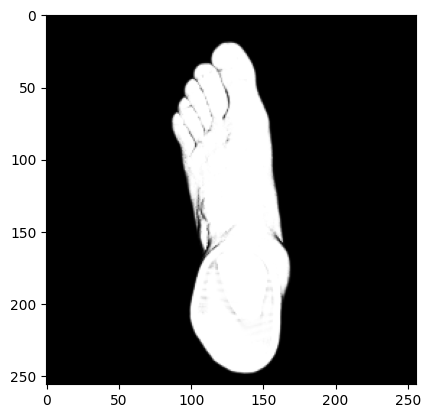

In [7]:
import matplotlib.pyplot as plt

plt.imshow(mask, cmap='gray')

In [58]:
def add_image_title(image, title, padding=20, text_height=50):
    """
    Add a title to an image by placing it on top of a white background.

    :param image: The image to add the title to.
    :param title: The title to add to the image.
    :param padding: The padding between the image and the background.
    """

    # Get the dimensions of the image
    height, width, _ = image.shape

    # Calculate the dimensions for the background based on the image and padding
    background_height = height + 2 * padding + text_height
    background_width = max(width, text_height) + 2 * padding

    # Create a white background with the calculated dimensions
    background = np.ones((background_height, background_width, 3), dtype=np.uint8) * 255

    # Calculate the coordinates to place the image within the background
    x = (background_width - width) // 2
    y = padding

    # Place the image on the background
    background[y : y + height, x : x + width] = image * 255

    # Add black text on top of the image
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 0.8
    text_thickness = 1
    text_size = cv2.getTextSize(title, font, font_scale, text_thickness)[0]
    text_x = (background_width - text_size[0]) // 2
    text_y = y + height + padding + text_size[1] + 5
    text_origin = (text_x, text_y)
    text_color = (0, 0, 0)  # Black color

    cv2.putText(
        background,
        title,
        text_origin,
        font,
        font_scale,
        text_color,
        text_thickness,
        cv2.LINE_AA,
    )

    return background

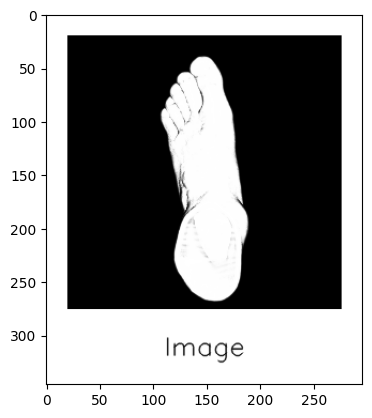

In [59]:
my_img = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
img = add_image_title(my_img, 'Image')
plt.imshow(img)

### Generate random foot

In [14]:
os.getcwd()

'/home/binders/FIND/src/dev'

In [24]:
# loading options
opts = "./../../exp/3D_only/FIND/opts.yaml"
opts = process_opts(opts, eval=True)
#opts.load_model = os.path.join("./../../exp/3D_only/FIND/model_best.pth")
# opts.device = device

usage: ipykernel_launcher.py [-h] [--gpu GPU] [--silent] [--left_only]
                             [--tpose_only] [--full_caching] [--train_and_val]
                             [--low_poly_meshes] [--low_res_textures]
                             [--n_train N_TRAIN] [--n_val N_VAL]
                             [--batch_size_train BATCH_SIZE_TRAIN]
                             [--batch_size_val BATCH_SIZE_VAL] [--shuffle]
                             [--model_type {neural,pca,vertexfeatures,supr}]
                             [--load_model LOAD_MODEL]
                             [--model_name MODEL_NAME]
                             [--progressive_encoding]
                             [--no_positional_encoding] [--lr_net LR_NET]
                             [--lr_reg LR_REG] [--lr_val LR_VAL]
                             [--lr_latent LR_LATENT] [--reg]
                             [--reg_epochs REG_EPOCHS]
                             [--reg_save_every REG_SAVE_EVERY]
              

AssertionError: 